Load deps



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os as os


And set constants 



In [2]:
hash = "15273992372242372501" # uniquely identifies a run
fig_path = "figures"


Let's load some dataframes 



In [3]:
df = pd.read_csv("data/" + hash + ".csv") # front-loaded with stationary 
df_welfare = pd.read_csv("data/welfare_results-" + hash + ".csv")
df_autarky = pd.read_csv("data/autarky_results-" + hash + ".csv")


The main dataframe is front-loaded with the time-0 stationary solution



In [4]:
df.head(10)

,t,g,z_hat,Ω,E,v_1,entry_residual,L_tilde,λ_ii,S,...,c,π_min,log_M,U,π_rat,L_tilde_a,L_tilde_x,L_tilde_E,w,r
0,-20.0,0.006742,1.977552,0.961287,0.020000,4.971269,-0.010476,0.230576,0.895606,0.098952,...,1.033269,0.186648,-0.134835,16.106814,1.811008,0.095121,0.020914,0.114541,0.919614,0.048242
1,-15.0,0.006742,1.977552,0.961287,0.020000,4.971269,-0.010476,0.230576,0.895606,0.098952,...,1.033269,0.186648,-0.101126,16.106814,1.811008,0.095121,0.020914,0.114541,0.919614,0.048242
2,-10.0,0.006742,1.977552,0.961287,0.020000,4.971269,-0.010476,0.230576,0.895606,0.098952,...,1.033269,0.186648,-0.067417,16.106814,1.811008,0.095121,0.020914,0.114541,0.919614,0.048242
3,-5.0,0.006742,1.977552,0.961287,0.020000,4.971269,-0.010476,0.230576,0.895606,0.098952,...,1.033269,0.186648,-0.033709,16.106814,1.811008,0.095121,0.020914,0.114541,0.919614,0.048242
4,-1.0,0.006742,1.977552,0.961287,0.020000,4.971269,-0.010476,0.230576,0.895606,0.098952,...,1.033269,0.186648,-0.006742,16.106814,1.811008,0.095121,0.020914,0.114541,0.919614,0.048242
5,0.0,0.007519,1.871281,0.963349,0.017020,4.936391,-0.014101,0.224383,0.863194,0.102840,...,1.060454,0.180953,0.000000,19.859501,2.206533,0.099071,0.027628,0.097684,0.936274,0.047567
6,0.5,0.007566,1.870305,0.961921,0.017045,4.938429,-0.012060,0.224488,0.863020,0.103073,...,1.059685,0.181160,0.003771,20.043872,2.207179,0.099148,0.027659,0.097681,0.935722,0.047620
7,1.0,0.007612,1.869323,0.960506,0.017070,4.940502,-0.009984,0.224596,0.862844,0.103306,...,1.058919,0.181365,0.007566,20.228698,2.207834,0.099226,0.027691,0.097679,0.935176,0.047672
8,1.5,0.007659,1.868353,0.959106,0.017094,4.942513,-0.007970,0.224706,0.862670,0.103539,...,1.058157,0.181567,0.011383,20.413972,2.208483,0.099305,0.027723,0.097678,0.934635,0.047724
9,2.0,0.007706,1.867414,0.957720,0.017119,4.944366,-0.006114,0.224816,0.862501,0.103772,...,1.057398,0.181769,0.015225,20.599683,2.209107,0.099385,0.027752,0.097678,0.934096,0.047773



## Welfare Gains from Trade 



In [5]:
df_welfare.head()

,steady_state,transition_path,growth_rate,theta
0,7.651742,8.402695,0.00857,5.0018



This reports the welfare gains. One to the left is the steady state, the one to the right is the transition path. Unlike our previous (wrong) stuff, the amplification is much more modest. Not hugly different.



In [6]:
ACR_gains = 100*(((df.λ_ii.iloc[-1])/(df.λ_ii.iloc[0]))**(-1 / df_welfare.theta.iloc[0]) - 1)
print("Change in Trade", 1- df.λ_ii.iloc[0], 1- df.λ_ii.iloc[-1])
print("ACR Gains", ACR_gains)

Change in Trade 0.10439389622148088 0.1420458794438334
ACR Gains 0.8623896986171831



This reports the ACR implied gains. Need to verify the fomula, but I think this is correct. 0.2 percent increace in welfare. Our model is saying a 14 percentage point increase in welfare. One thing to think about is our consumption response strictly dwarfs just the ACR number. Then there is the growth effect.

## Autarky Results 

Here are the welfare gains from going to autarky....transition path is not included. But here to address the Ref 2's concerns about "range" of outcomes associated with the model




In [7]:
df_autarky.head()

,steady_state,growth_rate,theta
0,-15.522308,0.002438,5.0018


In [8]:
ACR_autarky = 100*(((df.λ_ii.iloc[-1]))**(-1 / df_welfare.theta.iloc[0]) - 1)
# print("Change in Trade", 1- df.λ_ii.iloc[0], 1- df.λ_ii.iloc[-1])
print("Autarky ACR Gains", ACR_autarky )

Autarky ACR Gains 3.110382578677595



A couple of things about this. One is that the SS-comparision is not that much different than what we had be for. The key issue is that trade is not changing as much, we are starting from a relativly closed economy. This shows up in the comparision to the ACR autarky gains. This numer is small, smaller than the 13 percent in the paper, why? We are starting from a lower level of trade, so the loss from autarky is smaller.

## Plots 

### Real Discount Factor 



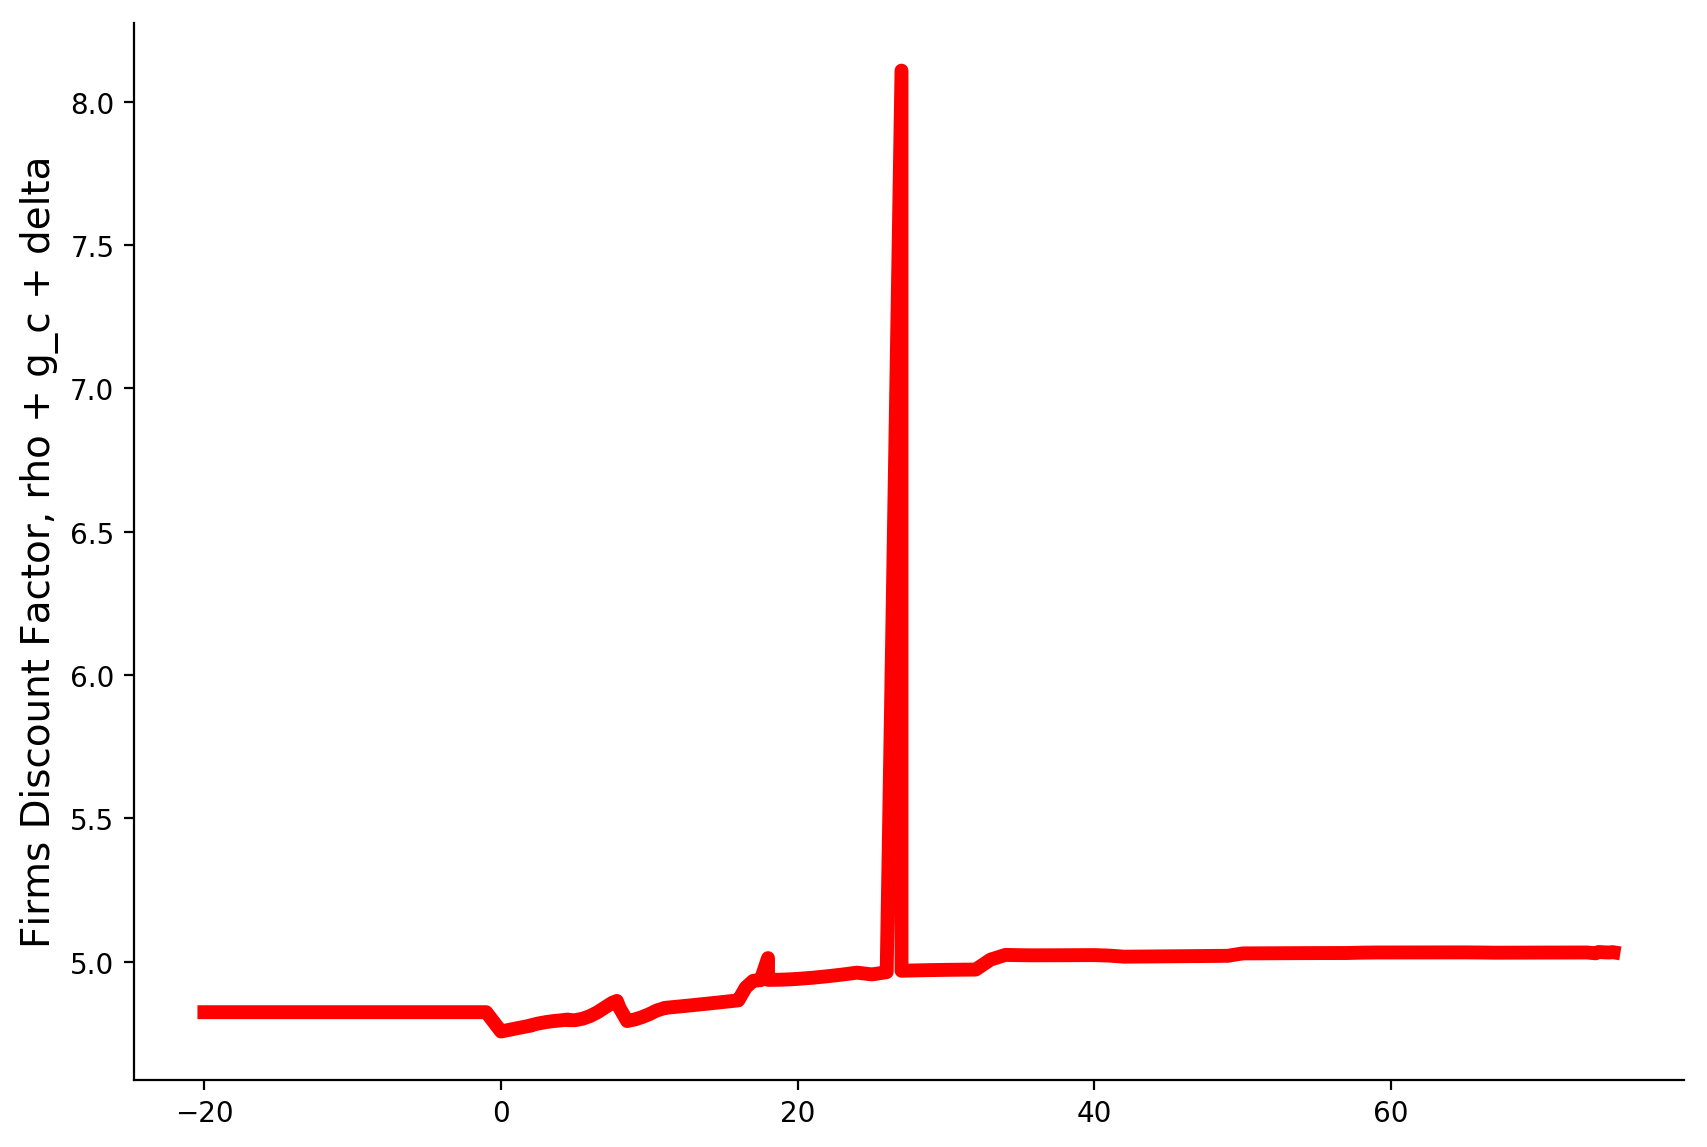

In [9]:
fig, ax = plt.subplots(figsize = (10,7))

ax.plot(df.t, 100*df.r, color = "red", lw = 5,
        label = "Growth Rate", ls = "-")

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

ax.set_ylabel("Firms Discount Factor, rho + g_c + delta", fontsize = 14) 
# ax.set_xlim(-20,50)
# ax.set_ylim(7.5,9.0)

#plt.savefig(fig_path + "/growth.pdf", bbox_inches = "tight", dip = 3600)

plt.show()


### Growth Rate of Productivity 



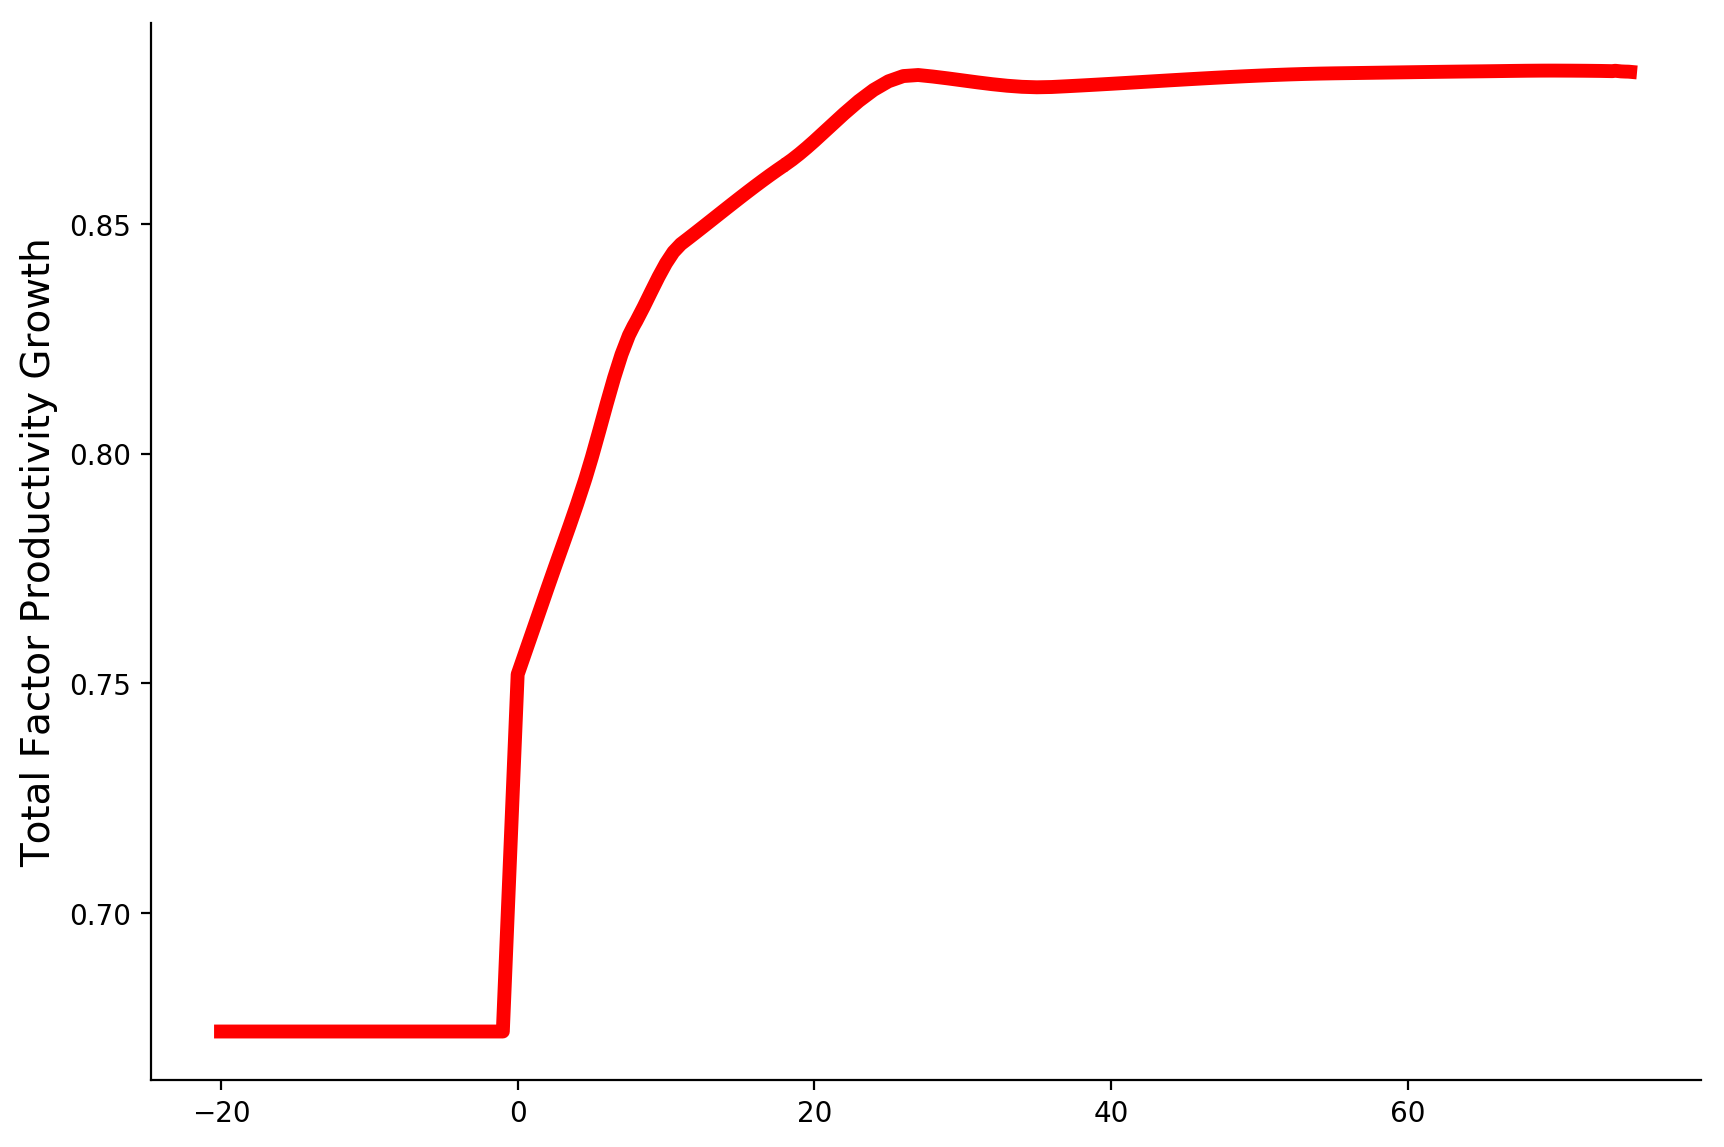

In [10]:
fig, ax = plt.subplots(figsize = (10,7))

ax.plot(df.t, 100*df.g, color = "red", lw = 5,
        label = "Growth Rate", ls = "-")

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

ax.set_ylabel("Total Factor Productivity Growth", fontsize = 14) 
# ax.set_xlim(-20,50)
# ax.set_ylim(0.75,1.30)

plt.savefig(fig_path + "/growth.pdf", bbox_inches = "tight", dip = 3600)

plt.show()


### Volume of Trade 



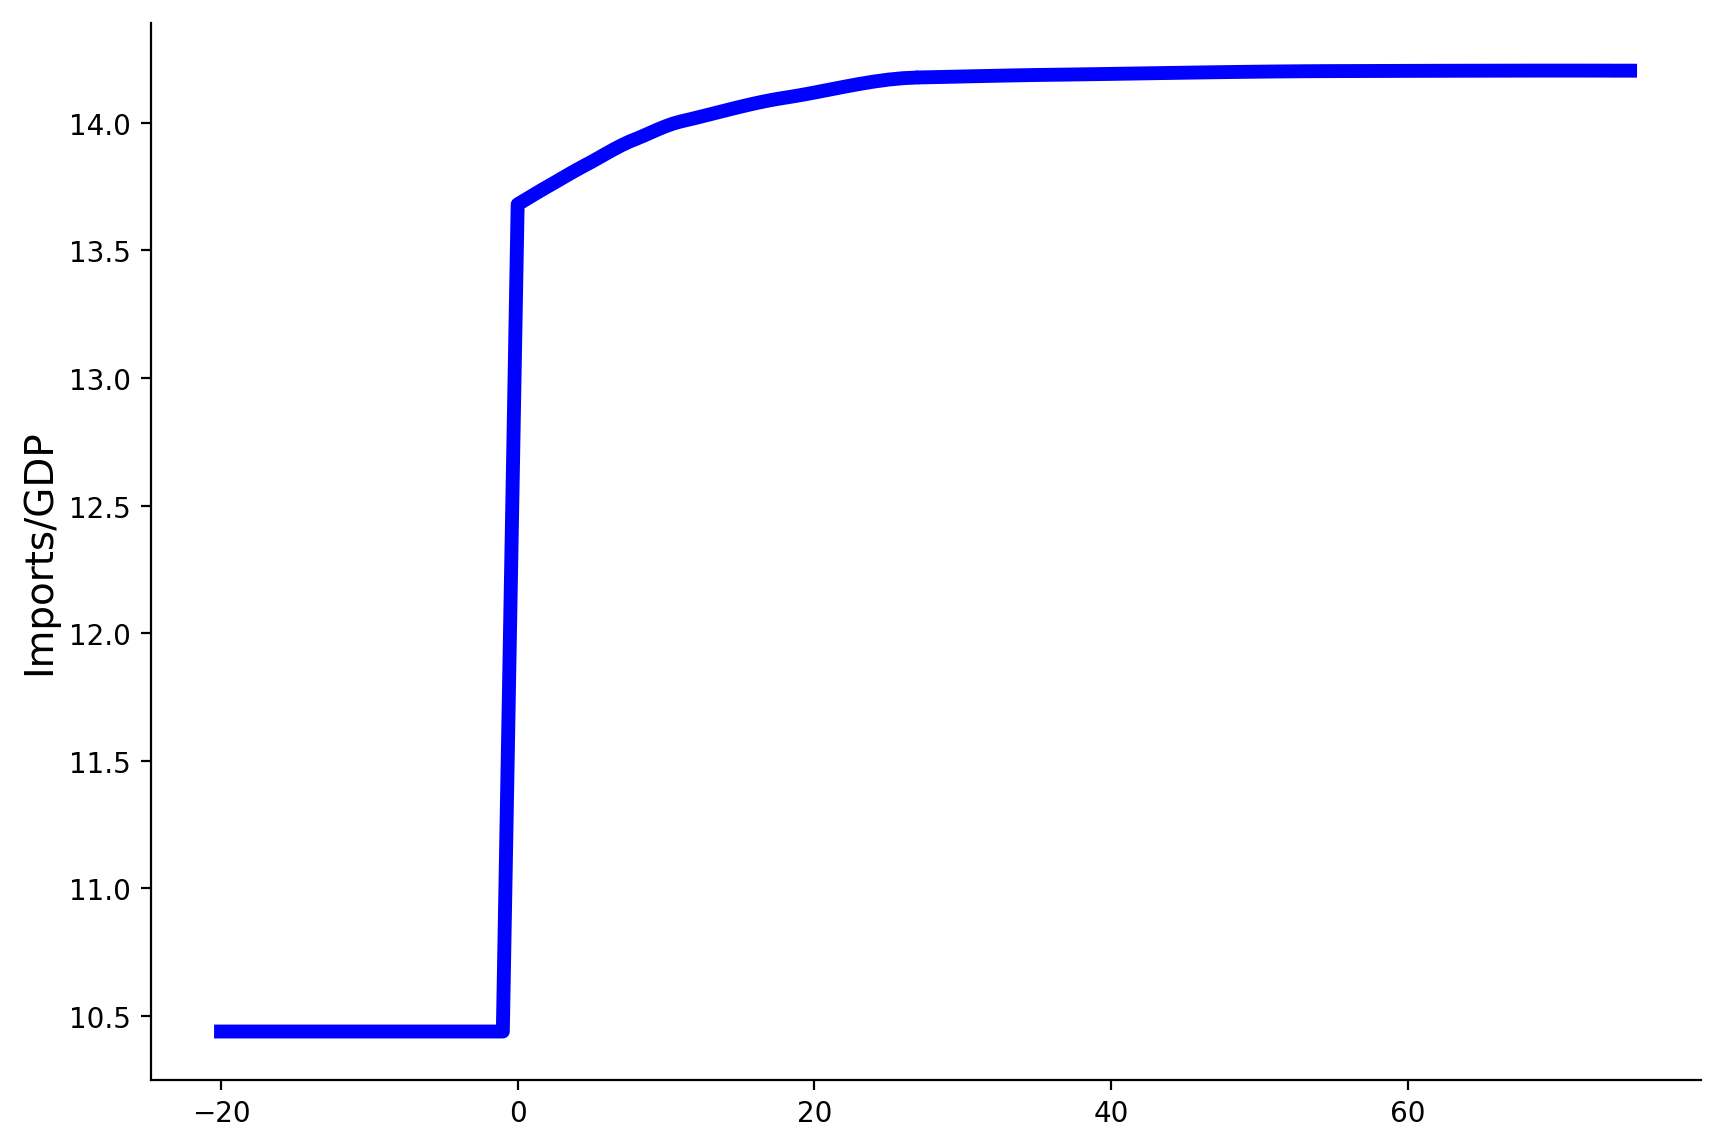

In [11]:
fig, ax = plt.subplots(figsize = (10,7))

ax.plot(df.t, 100*(1-df.λ_ii), color = "blue", lw = 5,
        label = "Growth Rate", ls = "-")

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

ax.set_ylabel("Imports/GDP", fontsize = 14) 
# ax.set_xlim(-20,50)
# ax.set_ylim(9,15)

plt.savefig(fig_path + "/trade.pdf", bbox_inches = "tight", dip = 3600)

plt.show()


### Pi Ratio 



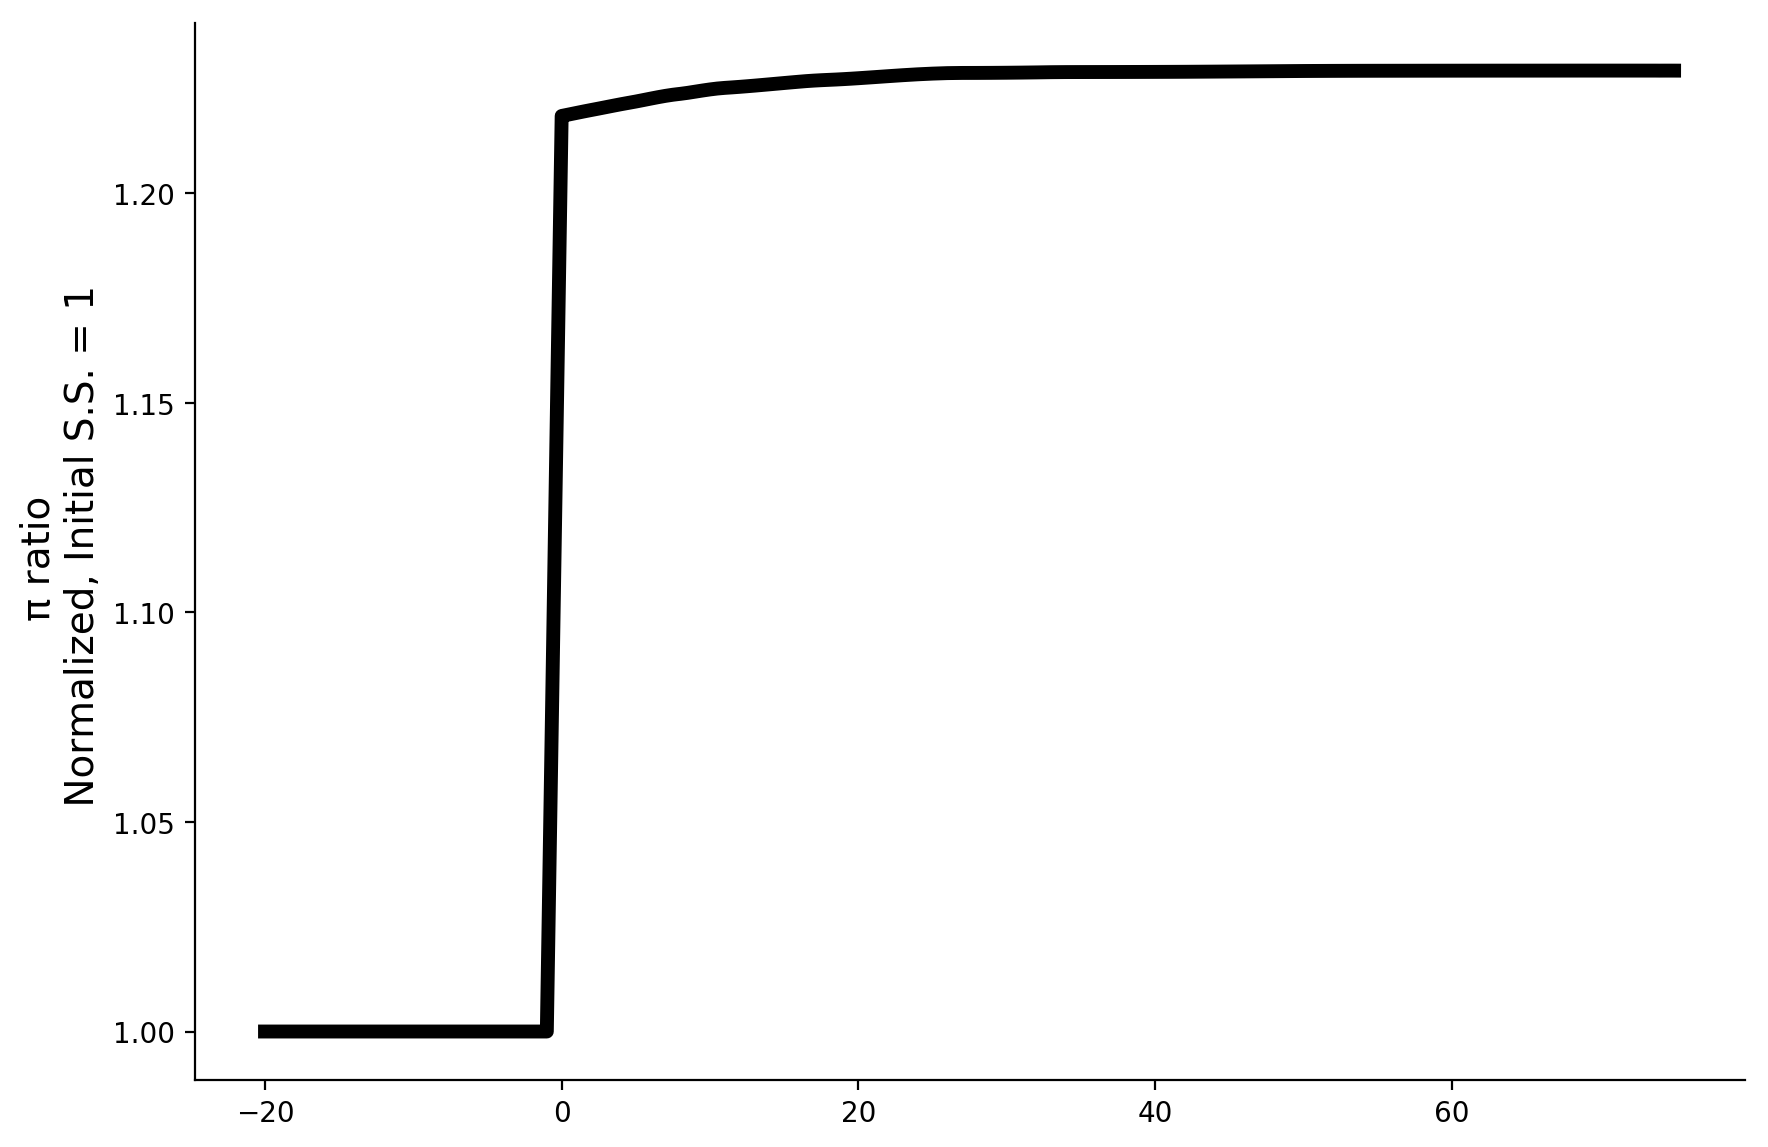

In [12]:
fig, ax = plt.subplots(figsize = (10,7))

ax.plot(df.t, df.π_rat/df.π_rat.iloc[0], color = "black", lw = 5,
        label = "Growth Rate", ls = "-")

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# ax.set_ylim(0.95,1.30)
# ax.set_xlim(-20,50)

ax.set_ylabel("π ratio \n Normalized, Initial S.S. = 1", fontsize = 14) 

plt.savefig(fig_path + "/pi_ratio.pdf", bbox_inches = "tight", dip = 3600)

plt.show()


### Consumption 



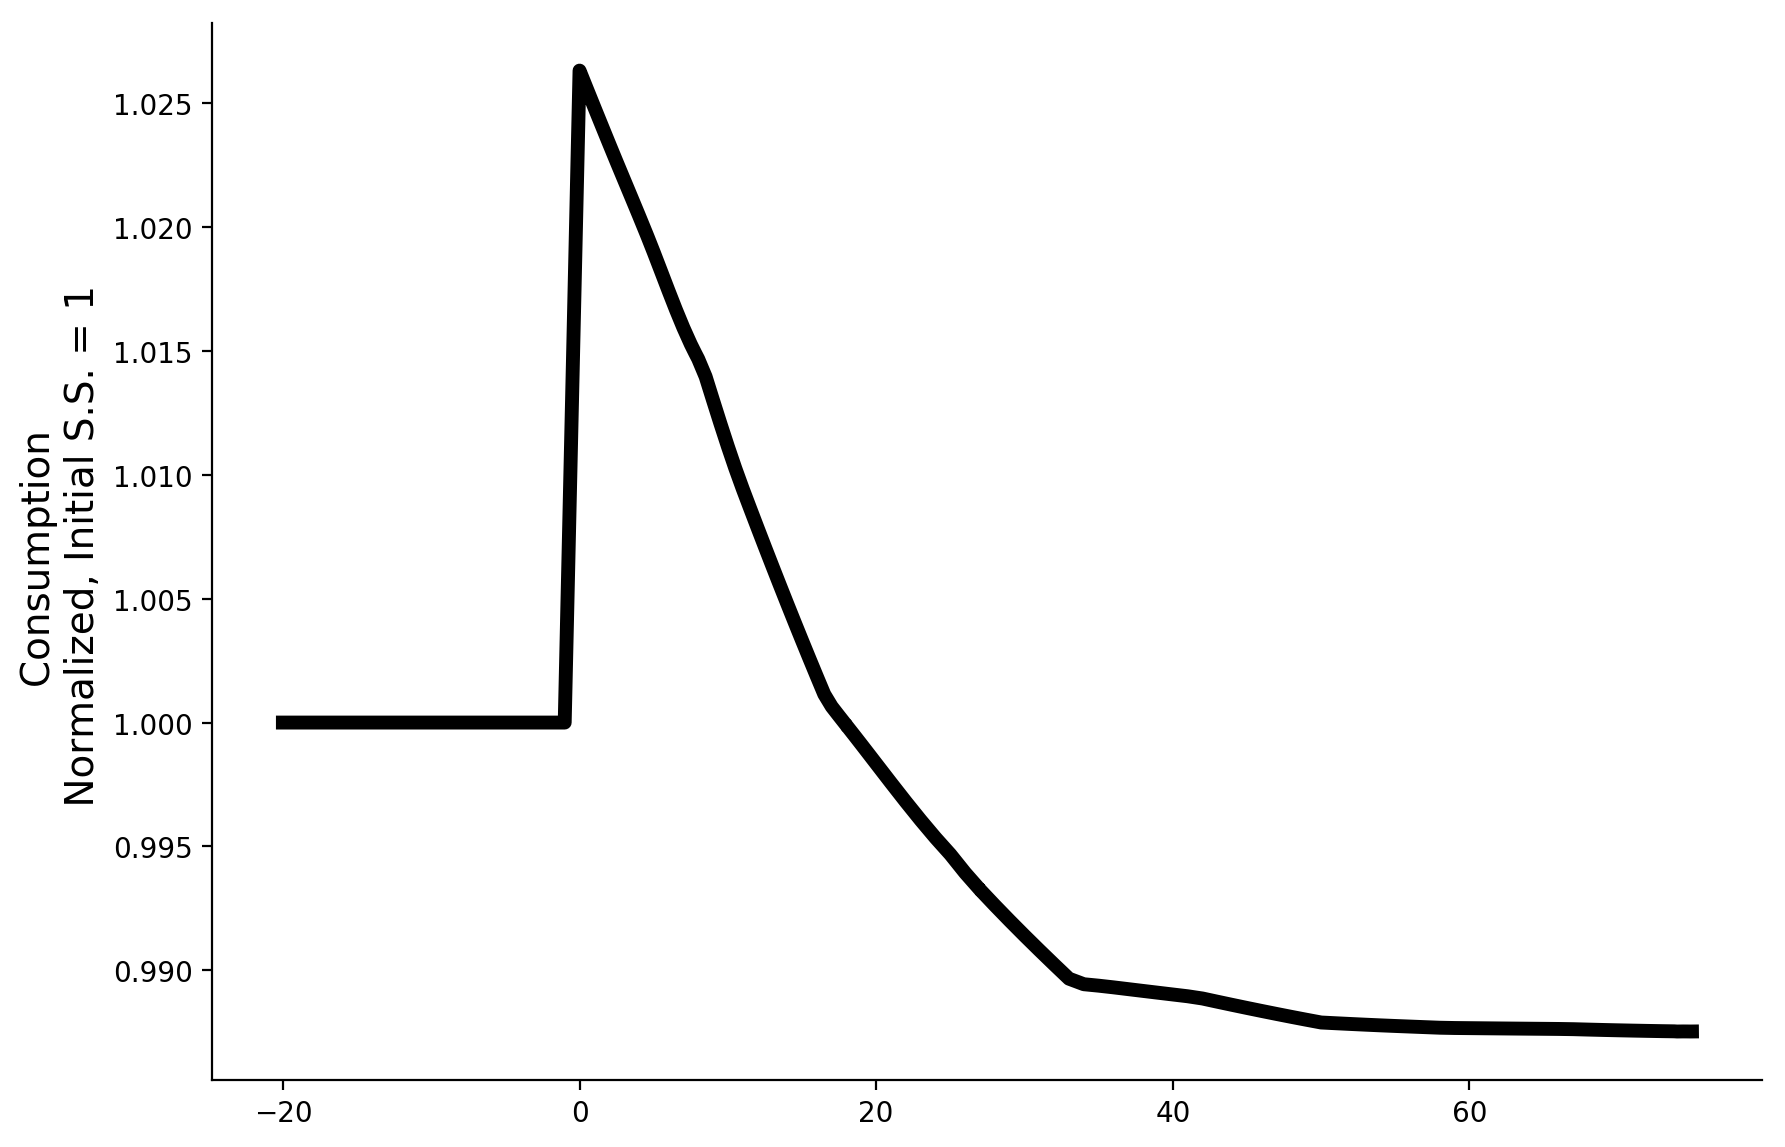

In [13]:
fig, ax = plt.subplots(figsize = (10,7))

ax.plot(df.t, df.c/df.c.iloc[0], color = "black", lw = 5,
        label = "Growth Rate", ls = "-")

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

ax.set_ylabel("Consumption \n Normalized, Initial S.S. = 1", fontsize = 14) 

# ax.set_ylim(0.98,1.04)

# ax.set_xlim(-20,50)

plt.savefig(fig_path + "/consumption.pdf", bbox_inches = "tight", dip = 3600)

plt.show()


### Domestic Variety 

This one looks a little different with the new parameters. 



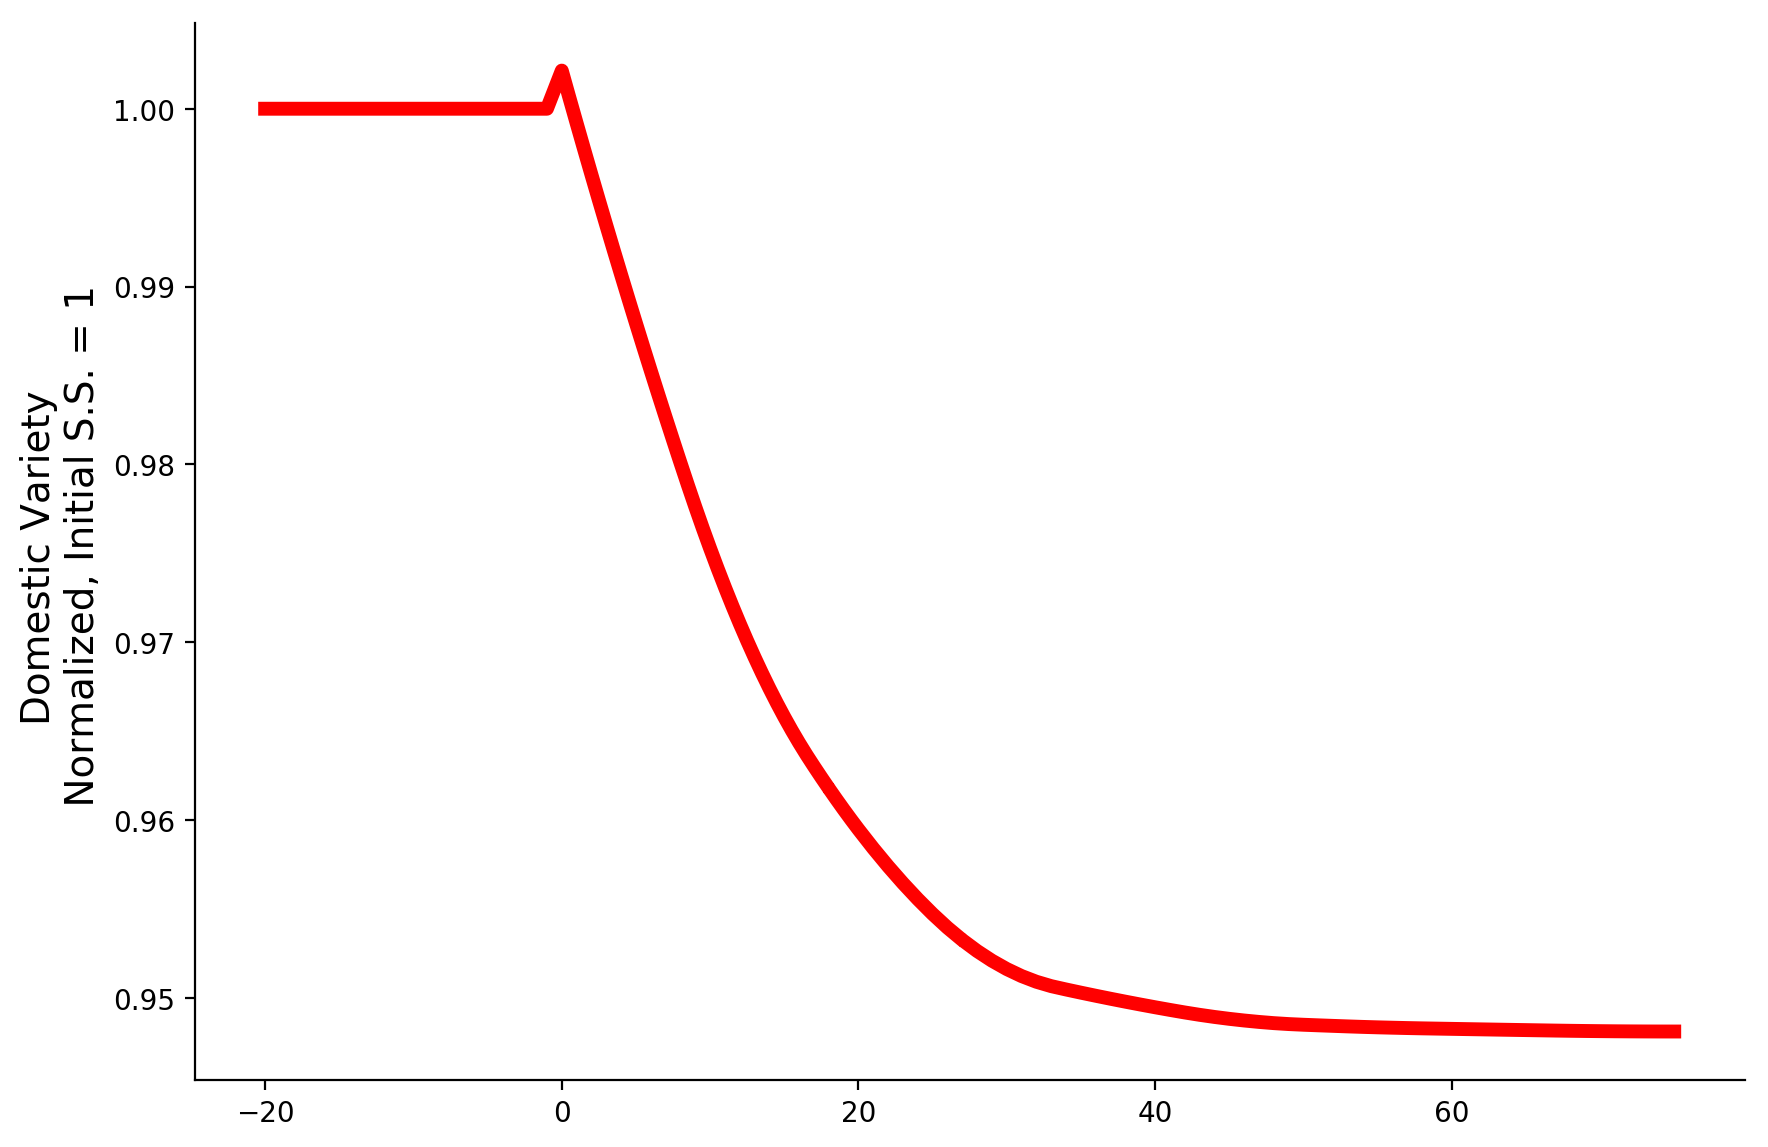

In [14]:
fig, ax = plt.subplots(figsize = (10,7))

ax.plot(df.t, df.Ω/df.Ω.iloc[0], color = "red", lw = 5,
        label = "", ls = "-")

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

ax.set_ylabel("Domestic Variety \n Normalized, Initial S.S. = 1", fontsize = 14) 

# ax.set_ylim(0.94,1.04)

# ax.set_xlim(-20,50)

plt.savefig(fig_path + "/omega.pdf", bbox_inches = "tight", dip = 3600)

plt.show()


### Reallocation Effects

So this shows the total amount of labor used for fixed costs and then breaks it down. So Adoption and Exporting go up, this is the first line. This is a force to lower consumption. However, entry falls, this is the blue line. The drop in labor going to entry is far larger than the increase initially. So, in total, a bunch of labor is allocated towards consumption amplifying the gains from trade.




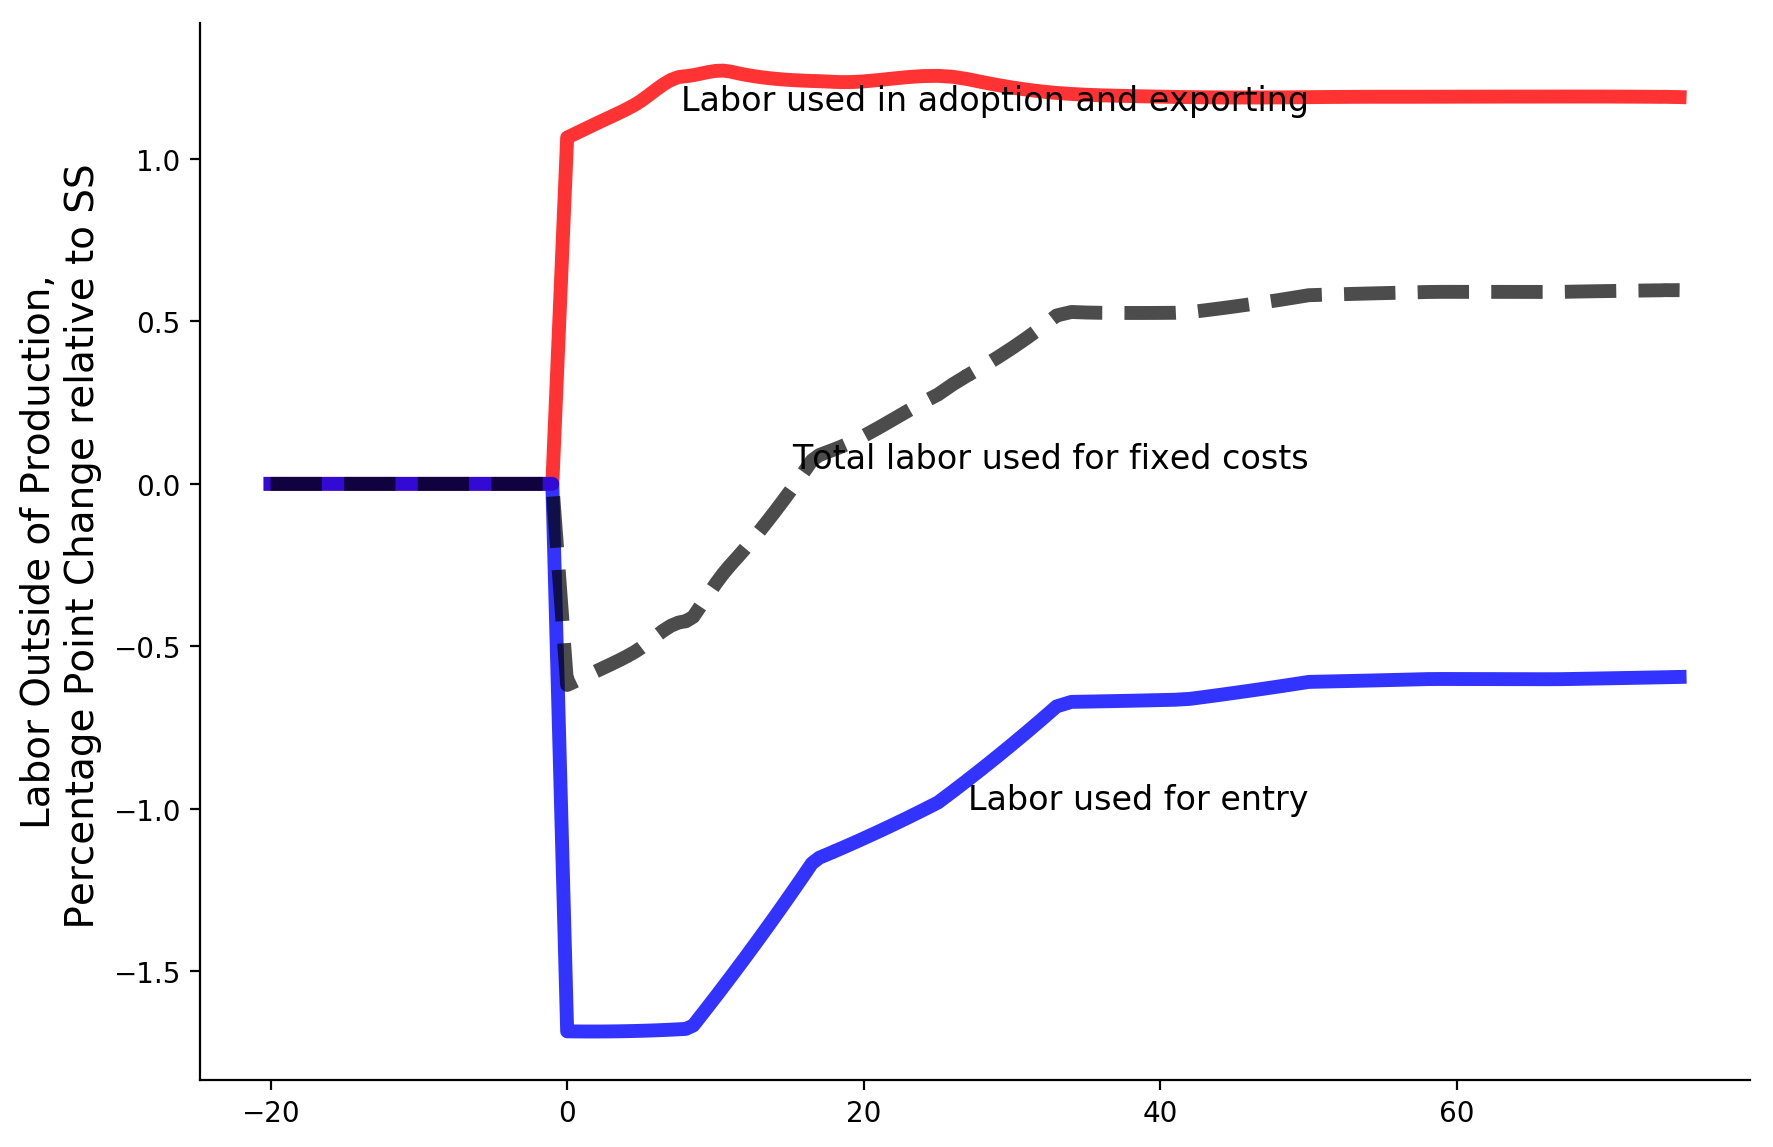

In [15]:
fig, ax = plt.subplots(figsize = (10,7))

ax.plot(df.t, 100*((df.L_tilde_x + df.L_tilde_a) - (df.L_tilde_a.iloc[0] + df.L_tilde_x.iloc[0])), color = "red", lw = 5, ls = "-", alpha = 0.80)

ax.plot(df.t, 100*(df.L_tilde_E - df.L_tilde_E.iloc[0]) , color = "blue", lw = 5, ls = "-", alpha = 0.80)

ax.plot(df.t, 100*(df.L_tilde - df.L_tilde.iloc[0]), color = "black", lw = 5, ls = "--", alpha = 0.70)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

ax.set_ylabel("Labor Outside of Production,\n Percentage Point Change relative to SS", fontsize = 14) 

# ax.set_xlim(-20,50)
# ax.set_ylim(-2.05,2.05)

ax.text(50, 1.15, "Labor used in adoption and exporting", horizontalalignment='right', fontsize = 12) 

ax.text(50, 0.05, "Total labor used for fixed costs", horizontalalignment='right', fontsize = 12) 

ax.text(50, -1.0, "Labor used for entry", horizontalalignment='right', fontsize = 12) 

#plt.savefig(fig_path + "/fixed_costs.pdf", bbox_inches = "tight", dip = 3600)

plt.show()


And another plot 



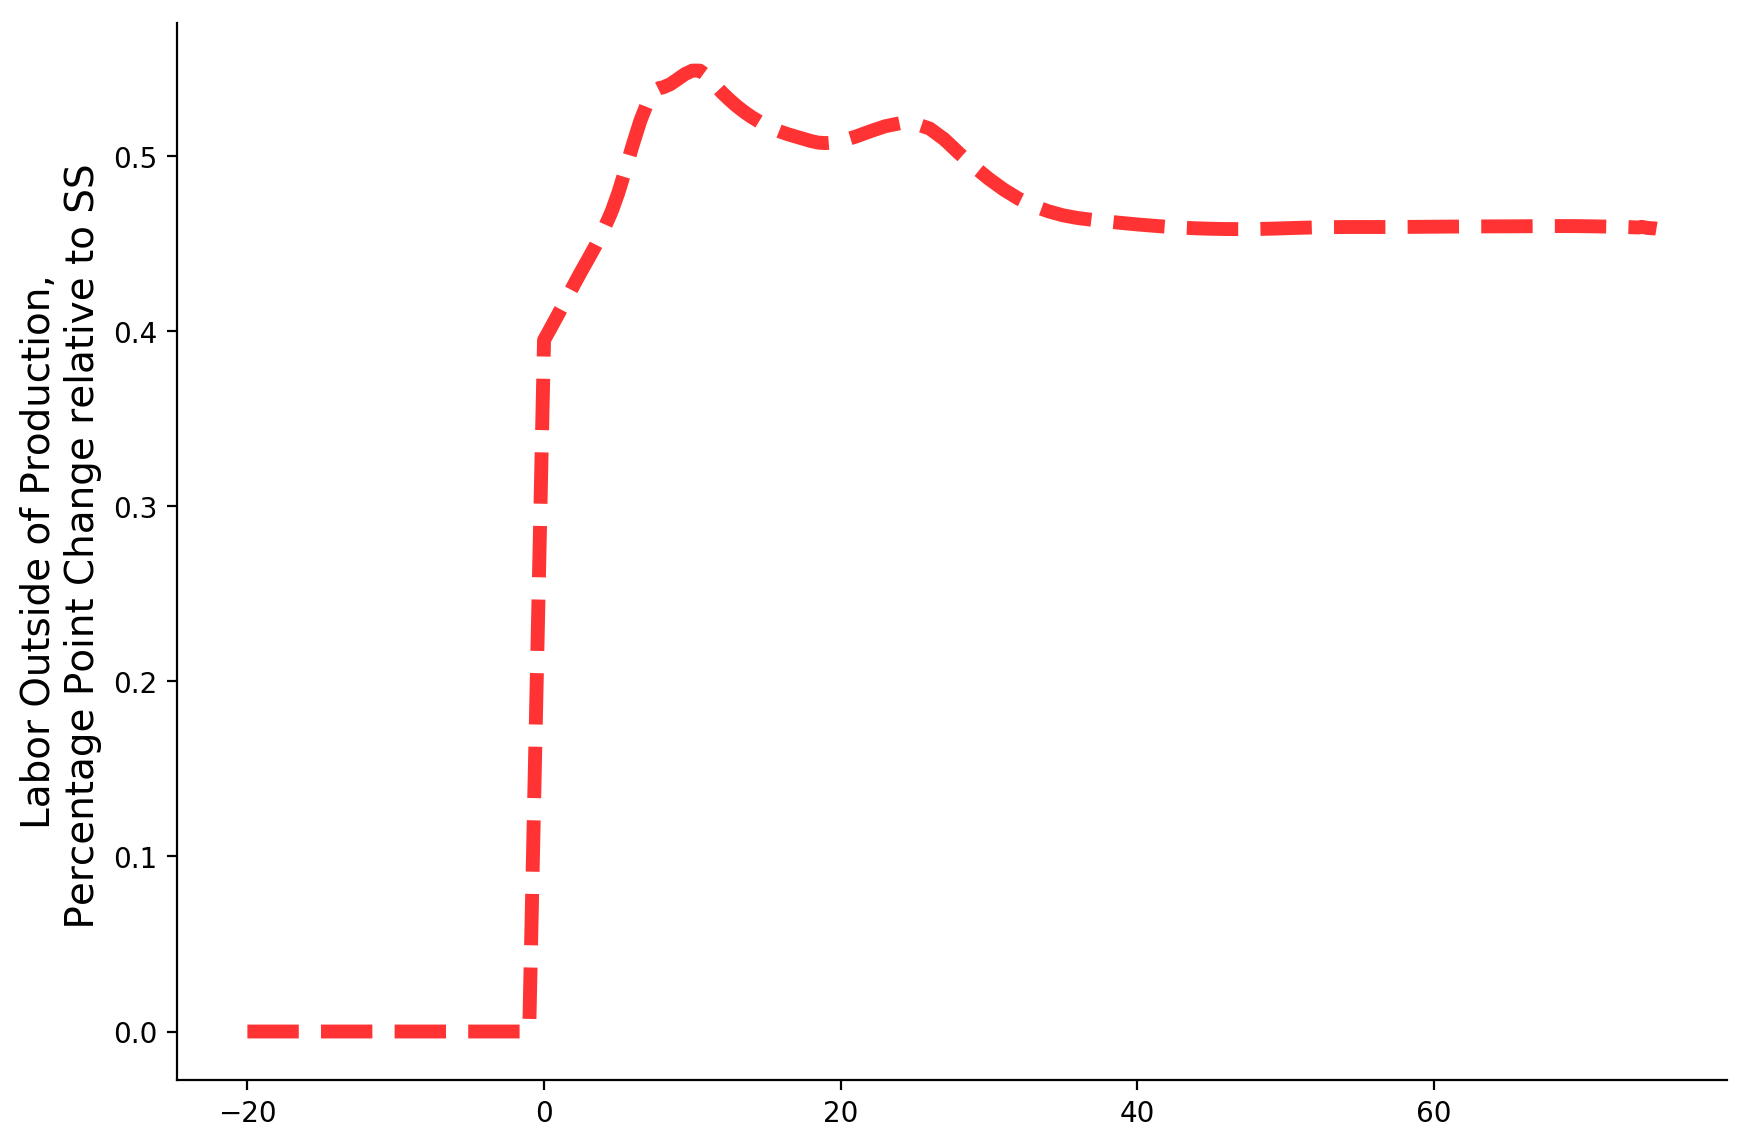

In [16]:
fig, ax = plt.subplots(figsize = (10,7))

#ax.plot(df.t, 100*((df.L_tilde_x) - ( df.L_tilde_x.iloc[0])), color = "red", lw = 5, ls = "-", alpha = 0.80)

ax.plot(df.t, 100*((df.L_tilde_a) - (df.L_tilde_a.iloc[0])), color = "red", lw = 5, ls = "--", alpha = 0.80)

#ax.plot(df.t, 100*(df.L_tilde_E - df.L_tilde_E.iloc[0]) , color = "blue", lw = 5, ls = "-", alpha = 0.80)

#ax.plot(df.t, 100*(df.L_tilde - df.L_tilde.iloc[0]), color = "black", lw = 5, ls = "--", alpha = 0.70)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

ax.set_ylabel("Labor Outside of Production,\n Percentage Point Change relative to SS", fontsize = 14) 

# ax.set_xlim(-20,50)
#ax.set_ylim(-2.05,2.05)

#ax.text(50, 1.15, "Labor used in adoption and exporting", horizontalalignment='right', fontsize = 12) 

#ax.text(50, 0.05, "Total labor used for fixed costs", horizontalalignment='right', fontsize = 12) 

#ax.text(50, -1.0, "Labor used for entry", horizontalalignment='right', fontsize = 12) 

#plt.savefig(fig_path + "/fixed_costs.pdf", bbox_inches = "tight", dip = 3600)

plt.show()